In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("Desktop/samp.txt")
print(df)

   sno  temp  pressure
0    1     0    0.0002
1    2    20    0.0012
2    3    40    0.0600
3    4    60    0.0300
4    5    80    0.0900
5    6   100    0.2700


In [6]:
x=df.iloc[:,1:2].values
print(x)

[[  0]
 [ 20]
 [ 40]
 [ 60]
 [ 80]
 [100]]


In [10]:
y=df.iloc[:,2].values
print(y)

[2.0e-04 1.2e-03 6.0e-02 3.0e-02 9.0e-02 2.7e-01]


In [12]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(x,y)
y_pred=lin.predict(x)
print(y_pred)

[-0.03800952  0.00728762  0.05258476  0.0978819   0.14317905  0.18847619]


Text(0, 0.5, 'pressure')

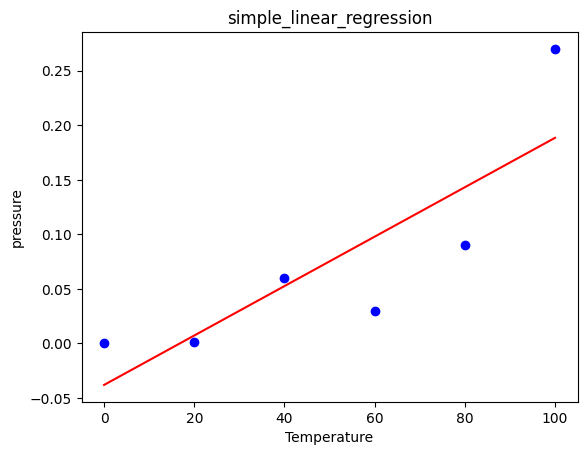

In [13]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='red')
plt.title('simple_linear_regression')
plt.xlabel('Temperature')
plt.ylabel('')

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [17]:
lin2=LinearRegression()
lin2.fit(x_poly,y)
y_poly=lin2.predict(x_poly)
print(y_poly)

[-0.00798889  0.02953016  0.02856825  0.03620317  0.0995127   0.2655746 ]


Text(0, 0.5, 'pressure')

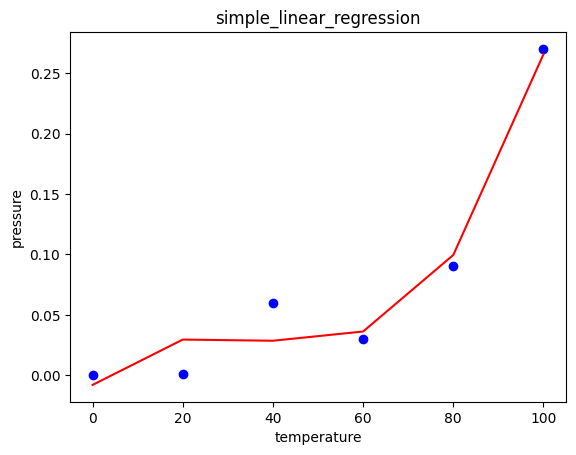

In [18]:
plt.scatter(x,y,color='blue')
plt.plot(x,y_poly,color='red')
plt.title('simple_linear_regression')
plt.xlabel('temperature')
plt.ylabel('pressure')

In [20]:
pred_df=pd.DataFrame({'Actual value':y,'predicted value':y_pred,'polynomial value':y_poly})
pred_df

,Actual value,predicted value,polynomial value
0,0.0002,-0.038010,-0.007989
1,0.0012,0.007288,0.029530
2,0.0600,0.052585,0.028568
3,0.0300,0.097882,0.036203
4,0.0900,0.143179,0.099513
5,0.2700,0.188476,0.265575


In [22]:
from sklearn.metrics import r2_score
print('simple linear regression',r2_score(y,y_pred))
print('polynomial regression',r2_score(y,y_poly))

simple linear regression 0.6966674748357813
polynomial regression 0.9610764356813889
